In [30]:
import netCDF4 as nc
import numpy as np
with nc.Dataset('/Users/mgrecu/AirborneData/IMPACTS2023_HIWRAP_KU_L1B_Rev-_20230115.h5') as f:
    print(f)
    time_Ku=f["Time/Data/TimeUTC"][:]
    #return None
    #dbz_ka=f["Products/Ka/Combined/Data/dBZe"][n1:n2,:]
    n1=time_Ku.shape[0]//2
    n2=n1*2
    n1=n1+8000
    n2=n1+2000
    dbz_ku=f["Products/Combined/Data/dBZe"][n1:n2,:]
    ldr=f["Products/Combined/Data/LDR"][n1:n2,:]
    lon=f["Navigation/Data/Longitude"][n1:n2]
    lat=f["Navigation/Data/Latitude"][n1:n2]
    height=f["Navigation/Data/Height"][n1:n2]
    vdop=f["Products/Combined/Data/Velocity_corrected"][n1:n2,:]
    time_Ku=time_Ku[n1:n2]
    radar_range=f["Products/Information/Range"][:]

with nc.Dataset('/Users/mgrecu/AirborneData/IMPACTS2023_HIWRAP_KA_L1B_Rev-_20230115.h5') as f:
    print(f)
    time_Ka=f["Time/Data/TimeUTC"][:]
    a=np.nonzero((time_Ka-time_Ku[0]+10)*(time_Ka-time_Ku[-1]-10)<=0)
    n1=a[0][0]
    n2=a[0][-1]
    time_Ka=time_Ka[n1:n2]
    dbz_ka=f["Products/Combined/Data/dBZe"][n1:n2,:]
    lon_ka=f["Navigation/Data/Longitude"][n1:n2]
    lat_ka=f["Navigation/Data/Latitude"][n1:n2]
    height_ka=f["Navigation/Data/Height"][n1:n2]
    ldr_ka=f["Products/Combined/Data/LDR"][n1:n2,:]
    radar_range_ka=f["Products/Information/Range"][:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Information, Navigation, Products, Time
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Information, Navigation, Products, Time


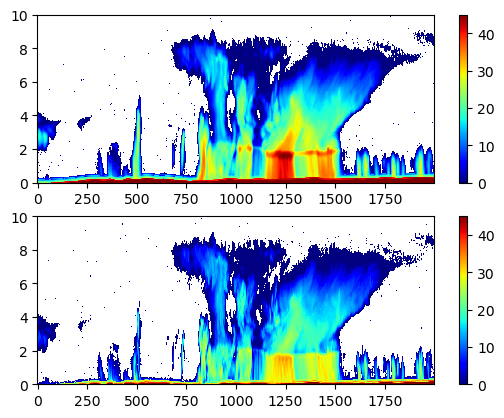

In [19]:
import matplotlib.pyplot as plt
import numpy as np
havg=np.mean(height)
h=havg-radar_range
plt.subplot(211)
plt.pcolormesh(range(2000),h/1e3,dbz_ku[:,:].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(0,10)
plt.colorbar()
#plt.figure()
#plt.plot(height)

zKaL=[]
for t1 in time_Ku:
    ind=np.argmin(np.abs(time_Ka-t1))
    zKaL.append(dbz_ka[ind,:])

havg_ka=np.mean(height_ka)
h_ka=havg_ka-radar_range_ka
plt.subplot(212)
plt.pcolormesh(range(2000),h_ka/1e3,np.array(zKaL).T,vmin=0,vmax=45,cmap='jet')
plt.ylim(0,10.)
plt.colorbar()

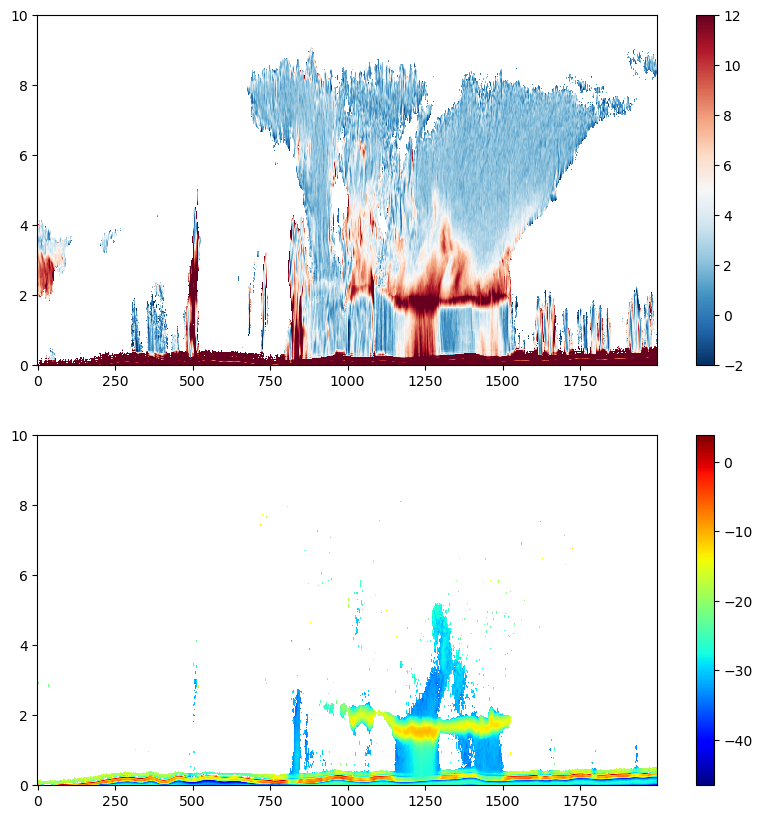

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.pcolormesh(range(2000),h/1e3,(dbz_ku[:,:]-zKaL).T,vmin=-2,vmax=12,cmap='RdBu_r')
plt.ylim(0,10)
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(range(2000),h_ka/1e3,(ldr).T,cmap='jet')
plt.ylim(0,10)
plt.colorbar()

(2039, 609)
(609,)
2039


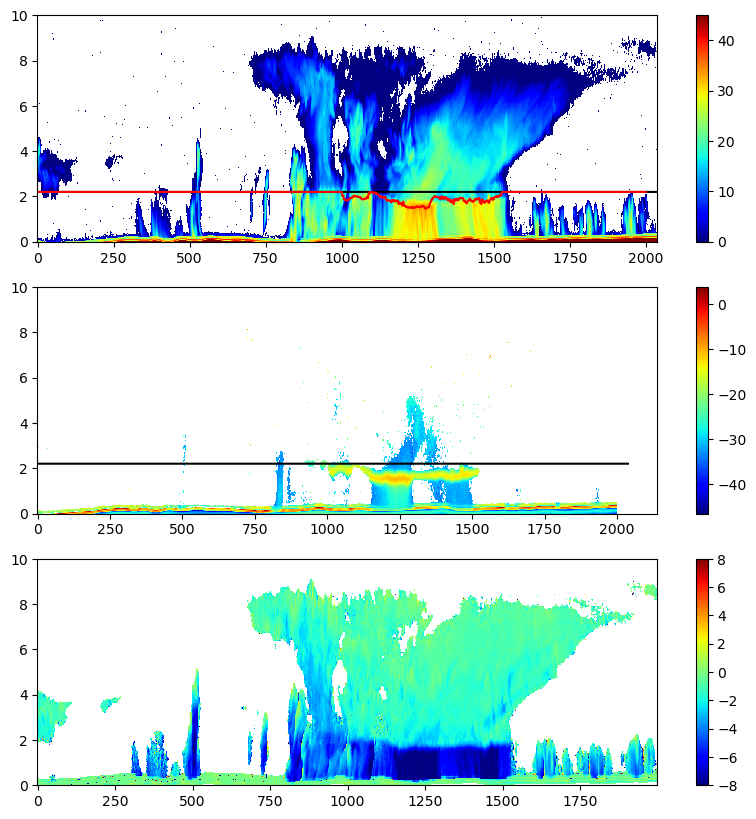

In [68]:
havg_ka=np.mean(height_ka)
h_ka=havg_ka-radar_range_ka
n_ka=dbz_ka.shape[0]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
print(dbz_ka.shape)
print(h_ka.shape)
print(n_ka)
plt.subplot(311)
plt.pcolormesh(range(n_ka),h_ka/1e3,dbz_ka[:,:].T,vmin=0,vmax=45,cmap='jet')
ml_height=[2.2 for i in range(n_ka)]
a=np.nonzero((h_ka/1e3-2.2)*(h_ka/1e3-1.2)<0)
ml_heigtKu=[2.2 for i in range(2000)]

for i in range(2000):
    b=np.nonzero(ldr[i,a[0]]==ldr[i,a[0]])
    if len(b[0])==0:
        continue
    ind=np.argmax(ldr[i,a[0][b]])
    
    
    if ldr[i,a[0][b]][ind]>-20:
        ml_heigtKu[i]=h_ka[a][ind]/1e3
plt.plot(range(n_ka),ml_height,'k')
plt.plot(range(2000),ml_heigtKu,'r')
plt.ylim(0,10)
plt.colorbar()
plt.subplot(312)
plt.pcolormesh(range(2000),h_ka/1e3,ldr[:,:].T,cmap='jet')
plt.plot(range(n_ka),[2.2 for i in range(n_ka)],'k')
plt.ylim(0,10)
plt.colorbar()
plt.subplot(313)
plt.pcolormesh(range(2000),h/1e3,vdop[:,:].T,cmap='jet',vmin=-8,vmax=8)    
plt.ylim(0,10)
plt.colorbar()



In [57]:
print(ldr[i,a[0]])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]


In [3]:
with nc.Dataset('profiles137/saf137.nc') as f:
    qv=f['hum'][:]
    temp=f['temp'][:]
    dz=f['dz'][:]
    p=f['pap'][:]
    rain=f['rain'][:]*3600 # convert from kg/m^2/s to mm/h
    snow=f['snow'][:]*3600 # convert from kg/m^2/s to mm/h
rho=p/(287.05*temp)

58


(0.0, 10000.0)

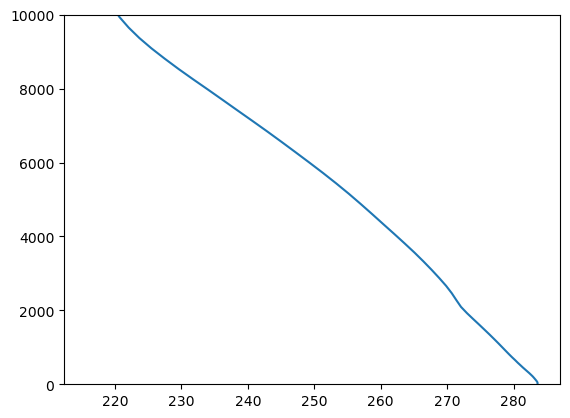

In [12]:
iprof=0
ecmwf_temp=[]
ecmwf_qv=[]
ecmwf_rho=[]
ecmwf_p=[]
ecmwf_rain=[]
ecmwf_snow=[]
ecmwf_h=[]
for i,temp1 in enumerate(temp):
    temp1_=temp1[::-1]
    qv1=qv[i,::-1]
    h1=np.cumsum(dz[i,::-1])
    p1=p[::-1]
    rho1=rho[i,::-1]
    rain1=rain[i][::-1]
    snow1=snow[i][::-1]
    a=np.nonzero(temp1_<273.15)
    if abs(h1[a[0][0]]-2000)<100:
        #print(i,h1[a[0][0]],temp1_[a[0][0]],qv1[a[0][0]],rho1[a[0][0]],rain1[a[0][0]],snow1[a[0][0]])
        ecmwf_temp.append(temp1_[:])
        ecmwf_qv.append(qv1[:])
        ecmwf_rho.append(rho1[:])
        ecmwf_p.append(p1[:])
        ecmwf_rain.append(rain1[:])
        ecmwf_snow.append(snow1[:])
        ecmwf_h.append(h1[:])
        iprof+=1
print(iprof)
ecmwf_temp=np.array(ecmwf_temp)
ecmwf_qv=np.array(ecmwf_qv)
ecmwf_rho=np.array(ecmwf_rho)
ecmwf_p=np.array(ecmwf_p)
ecmwf_rain=np.array(ecmwf_rain)
ecmwf_snow=np.array(ecmwf_snow)
ecmwf_h=np.array(ecmwf_h)
plt.plot(ecmwf_temp.mean(axis=0),ecmwf_h.mean(axis=0))
plt.ylim(0,10000)

(0.0, 4.0)

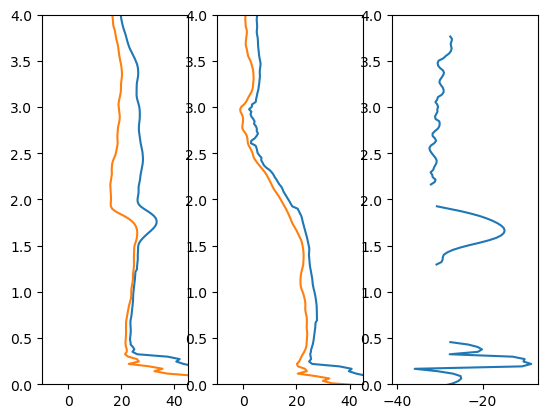

In [40]:
zKaL=np.array(zKaL)
plt.subplot(131)
plt.plot(dbz_ku[1350,:],h/1e3)
plt.plot(zKaL[1350,:],h_ka/1e3)
plt.ylim(0,4.)
plt.xlim(-10,45)
plt.subplot(132)
plt.plot(dbz_ku[890,:],h/1e3)
plt.plot(zKaL[890,:],h_ka/1e3)
plt.ylim(0,4.)
plt.xlim(-10,45)
plt.subplot(133)
plt.plot(ldr[1350,:],h/1e3)
plt.ylim(0,4)